# Question 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math

np.random.seed(10)
N_array = [10**(i) for i in range(1, 6)]

mu = np.array([[1], [2]])
Cov = np.array([[1.6250, -1.9486], [-1.9486, 3.8750]])

*Clearly, we know that the sample mean and sample covariance are the ML estimate for the maximum likelihood function*

In [269]:
def genDiag(a):
    K = np.zeros((a.shape[0],a.shape[0]))
    for i in range(a.shape[0]):
        K[i, i] = a[i]
    return K

In [281]:
eigenvalues, eigenvectors  = eig(Cov)
/# N is the number of random vectors to be generated appeded along the columns in a matrix
def genRandGauss(N):
    return (eigenvectors@np.sqrt(genDiag(eigenvalues))@(np.random.normal(0, 1, (len(eigenvalues), N))) + mu)
# genRandGauss(2)
# eigenvectors@np.sqrt(genDiag(eigenvalues))@np.random.rand(len(eigenvalues), 1) is the random gaussian variable


In [282]:
def frobeniusNorm(A):
    return math.sqrt((np.sum(A**2)))

In [330]:
data = []
errorList = []

for i in N_array:
    for j in range(100):
        A = genRandGauss(i)
        sampleMean = (np.sum(A, axis = 1)/i).reshape(2, 1)
        errorList.append(frobeniusNorm(sampleMean - mu)/frobeniusNorm(mu))
    data.append(errorList)
    errorList = []

In [332]:
def plotBox(data, xLabel):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])

    ax.set_xlabel("log(N)", fontsize=15)
    ax.set_ylabel(f"Error in {xLabel}", fontsize=15)
    bx = ax.boxplot(data)

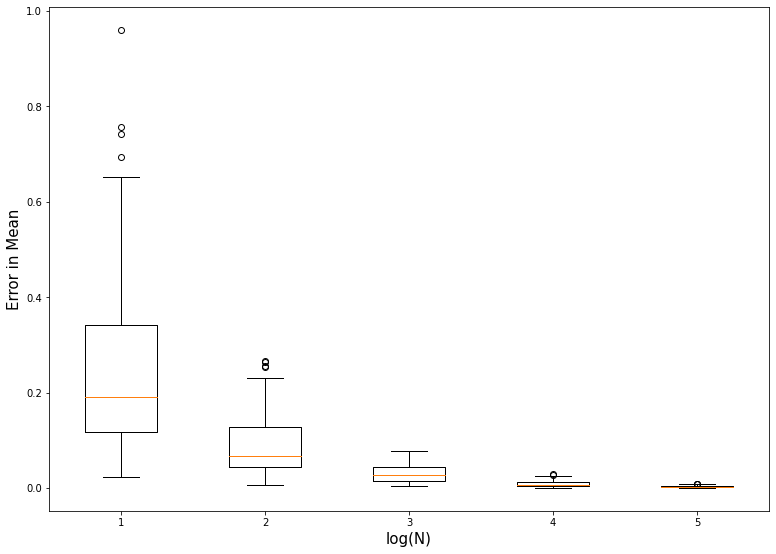

In [333]:
plotBox(data, "Mean")

## Covariance

In [334]:
data = []
errorList = []
for i in N_array:
    for j in range(100):
        X = genRandGauss(i)
        randCov = ((X-mu)@(X-mu).T)/i
        errorList.append(frobeniusNorm(randCov - Cov)/frobeniusNorm(Cov))
    data.append(errorList)
    errorList = []

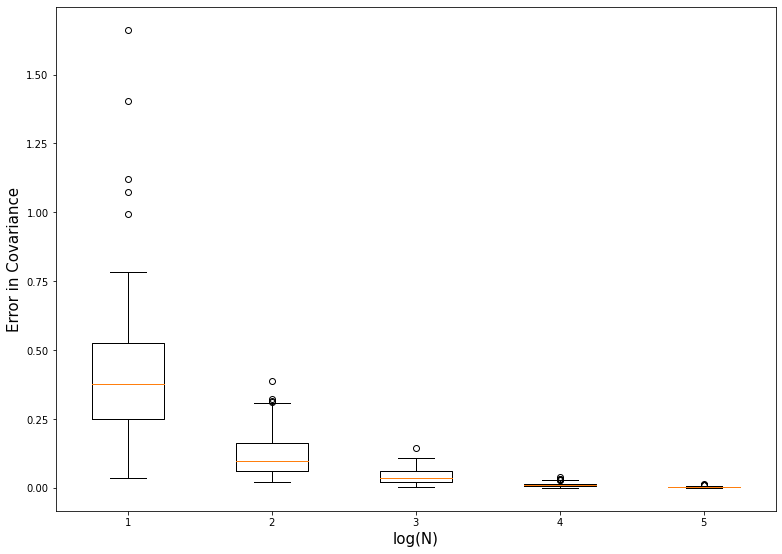

In [335]:
plotBox(data, "Covariance")

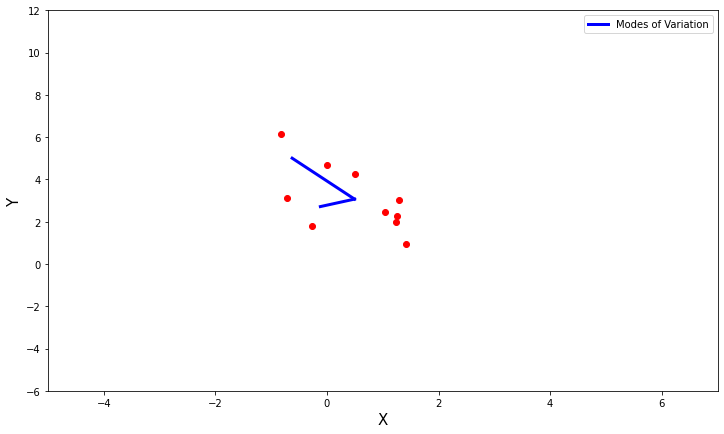

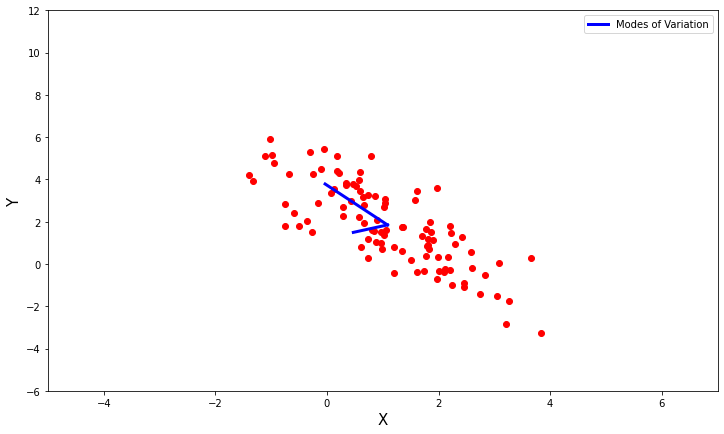

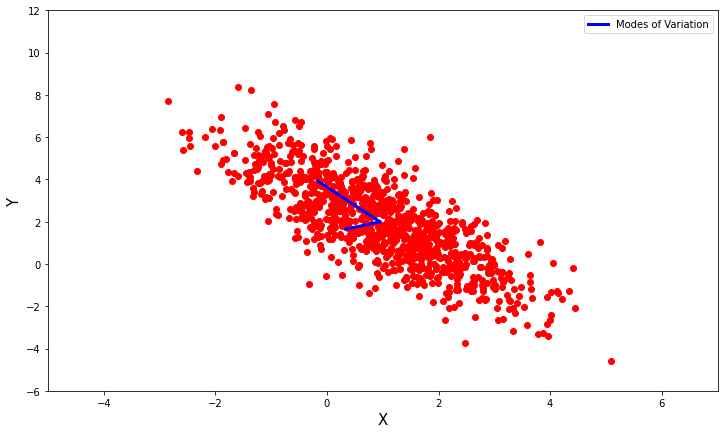

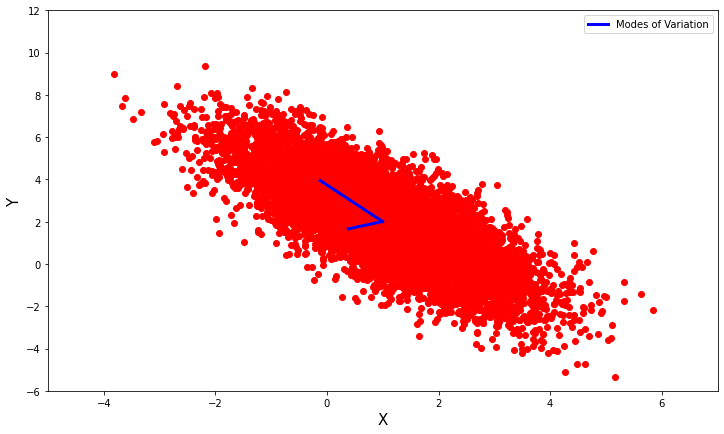

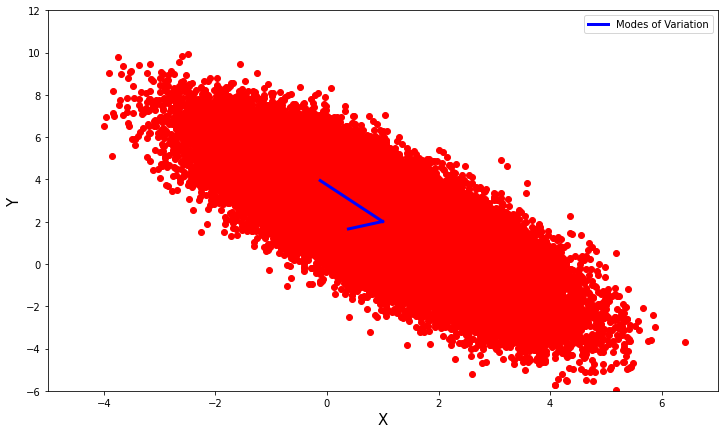

In [342]:
dir1 = eigenvectors[:, 0]
dir2 = eigenvectors[:, 1]

X = []
Y = []
num = 1
for i in N_array:
    mean = np.array([[0.0], [0.0]])
    for j in range(i):
        R = genRandGauss(1)
        mean+=R
        X.append(R[0])
        Y.append(R[1])
    mean = mean/i
    X1_line = [mean[0], mean[0] + dir1[0]*math.sqrt(eigenvalues[0])]
    Y1_line = [mean[1], mean[1] + dir1[1]*math.sqrt(eigenvalues[0])]
    
    X2_line = [mean[0], mean[0] - dir2[0]*math.sqrt(eigenvalues[1])]
    Y2_line = [mean[1], mean[1] - dir2[1]*math.sqrt(eigenvalues[1])]
    
    plt.figure(figsize=(12, 7))
    plt.plot(X1_line, Y1_line, color="blue", lw=3)
    plt.plot(X2_line, Y2_line, color="blue", lw=3)
    plt.scatter(X, Y, color="red")
    plt.legend(["Modes of Variation"])
    
    mean = mean*0
    num += 1
    X=[]
    Y=[]

    plt.xlabel("X", fontsize=15)
    plt.ylabel("Y", fontsize=15)
    plt.xlim(-5, 7)
    plt.ylim(-6, 12)
    plt.show()